## What Is It?

Convolution is a technique that is largely used in Image data as a method of abstracting simple features such as edges or color scale. It is an elegant technique, used in earlier layers of deep image networks to dramatically reduce computation and extract component features used in assembling more complicated features for later layers in the network.

### Sliding Scale

Essentially, the convolution operation involves taking a **convolution filter** of some fixed shape and values and sliding over our image and evaluating:

- An element-wise product
- A combined sum

And assigning it to a single cell in the output matrix, as below

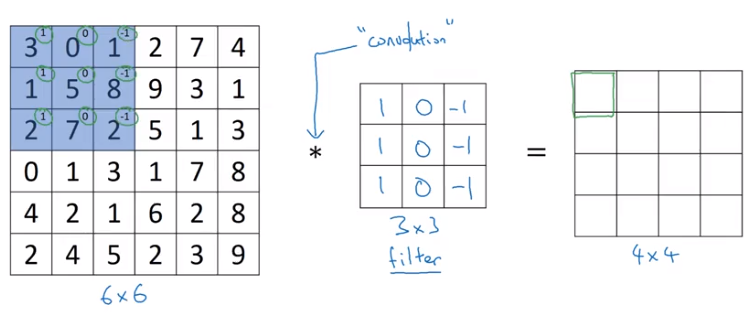

In [1]:
from IPython.display import Image
Image('images/conv_sliding.png')

### Edge Detection

The filter above can be used to detect vertical edges when scanned over the image

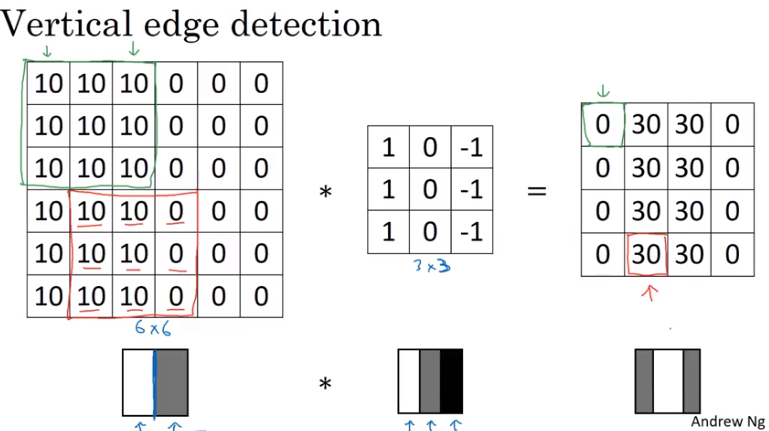

In [2]:
Image('images/conv_vert_edge.png')

Similarly, you could find horizontal edges using the following

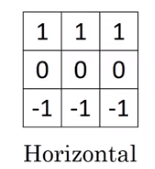

In [3]:
Image('images/conv_horiz_edge.png')

### As Parameters

Of course, not every edge or visual feature worth detecting fits a neat, linear boundary where you can employ close relatives to identity matricies.

Thus, your trained features in a Convolutional Layer are the actual weights of the filters you use to convolve over your image.

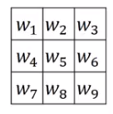

In [4]:
Image('images/conv_variable_filter.png')

## In 3d

We can also apply these same techniques to data expressed in multiple dimension. For instance, whereas the greyscale images above were simple pixels with values between 0 and 255, color images have that same structure but with a dimension for each RGB channel.

No matter, though, **as long as the final dimension of our filter is the same as our original image**, we can do basically the same convolution operation.

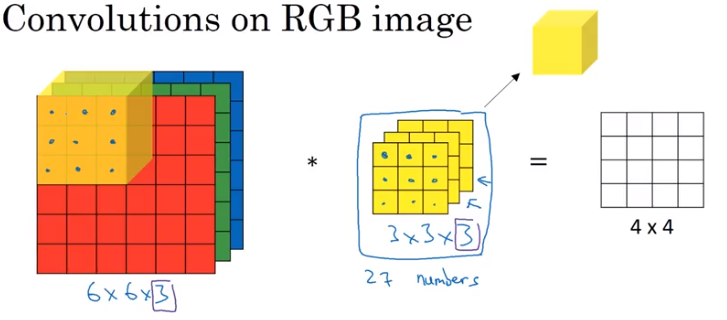

In [5]:
Image('images/convolving_3d.png')

## Why Convolution

Intuitively, the idea of "find simple features and assemble them into complex features at later layers" makes sense, but as mentioned above, there are also great mechanical benefits of using convolution to process image data.

Andrew Ng does a great job outlining this.

#### Reduced Complexity

Say our input data is RGB and `32x32`.

We know that we want to represent the first hidden layer as `28x28x6`. By using a traditional Neural Network layer, we'd wind up training a weight *for every single pair of nodes betwen the two*, which amounts to nearly 14 million weights.

On the other hand, training 6 `5x5` filters (plus a bias unit for each) gives us *dramatically* less weights for our model to sweat over.

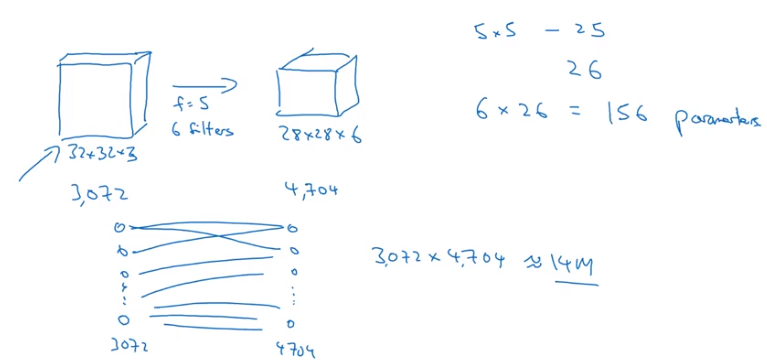

In [6]:
Image('images/why_conv_size.png')

#### Parameter Sharing

Similarly, if something like "vertical edge detection" is useful for our model, it's a no-brainer that we'd want to learn how to do *that* than hope that we independently learn both the existence and potential usefulness of each vertical edge in a given image.

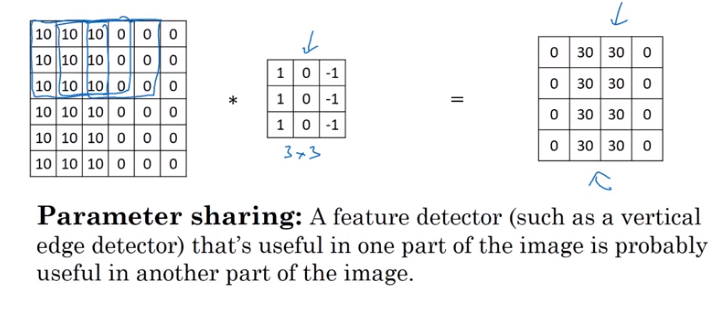

In [7]:
Image('images/why_conv_features.png')

#### Sparsity of Connections

Finally, Andrew also outlines a concept called *translation invariance* wherein the learned convolution features don't get hung up when your picture of a cat is on the left half of your image vs your right. Early layers detect the general shapes, which activate later layers to send those areas of the image to the "is this cat-like" layers-- never accidentally defining "cat-ness" with respect to any sort of location (which is sound science, as we all know that cats are more liquid than solid).